In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data_path = 'computer_science_student_career_datasetMar62024.csv'
dataset = pd.read_csv(data_path)

# Encoding
binary_mapping = {'Yes': 1, 'No': 0, 'Completed': 1, 'In Progress': 0}
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

data_encoded = dataset.copy()

# Binary Encoding
binary_columns = ['Coursework_Completion_Status', 'Internship_Experience', 'Certifications_Training', 'Leadership_Experience']
data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)

# Ordinal Encoding
data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)

# One-Hot Encoding for Personal Interests
personal_interests_encoded = pd.get_dummies(data_encoded['Personal_Interests'], prefix='Interest')
data_encoded = pd.concat([data_encoded.drop(columns=['Personal_Interests']), personal_interests_encoded], axis=1)

# Label Encoding for Career Goals
label_encoder = LabelEncoder()
data_encoded['Career_Goals'] = label_encoder.fit_transform(data_encoded['Career_Goals'])

# Augmentation (Random Oversampling)
X = data_encoded.drop(columns=['Career_Goals'])
y = data_encoded['Career_Goals']

# Combine X and y for resampling
data_combined = pd.concat([X, y], axis=1)
max_class_size = data_combined['Career_Goals'].value_counts().max()
balanced_data = []

# Oversample each class
for label in data_combined['Career_Goals'].unique():
    class_subset = data_combined[data_combined['Career_Goals'] == label]
    resampled_class = resample(class_subset, replace=True, n_samples=max_class_size, random_state=42)
    balanced_data.append(resampled_class)

balanced_data = pd.concat(balanced_data)

# Split back into X and y
X_resampled = balanced_data.drop(columns=['Career_Goals'])
y_resampled = balanced_data['Career_Goals']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Final Dataset after Augmentation and Scaling
final_dataset = pd.DataFrame(X_scaled, columns=X_resampled.columns)
final_dataset['Career_Goals'] = y_resampled.reset_index(drop=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(final_dataset.drop(columns=['Career_Goals']),
                                                    final_dataset['Career_Goals'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=final_dataset['Career_Goals'])

# Models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Logistic Regression
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred, zero_division=0)

# Random Forest Classifier
random_forest_model.fit(X_train, y_train)
rf_pred = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, zero_division=0)

# Support Vector Machine
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred, zero_division=0)

# Display Results
results = {
    "Logistic Regression": {
        "Accuracy": logistic_accuracy,
        "Report": logistic_report
    },
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "Report": rf_report
    },
    "SVM": {
        "Accuracy": svm_accuracy,
        "Report": svm_report
    }
}

print("Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Classification Report:\n{metrics['Report']}")


C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_11872\1873333516.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[binary_columns] = data_encoded[binary_columns].replace(binary_mapping)
C:\Users\autumnsimp\AppData\Local\Temp\ipykernel_11872\1873333516.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Academic_Achievements'] = data_encoded['Academic_Achievements'].replace(ordinal_mapping)


Results:

Logistic Regression:
Accuracy: 0.06418918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        44
           1       0.09      0.14      0.11        44
           2       0.02      0.02      0.02        45
           3       0.02      0.02      0.02        45
           4       0.02      0.02      0.02        44
           5       0.03      0.02      0.03        44
           6       0.11      0.07      0.08        44
           7       0.10      0.09      0.09        45
           8       0.00      0.00      0.00        44
           9       0.08      0.02      0.04        44
          10       0.00      0.00      0.00        45
          11       0.11      0.20      0.14        44
          12       0.07      0.09      0.08        44
          13       0.06      0.05      0.05        44
          14       0.00      0.00      0.00        45
          15       0.17      0.09      0.12        

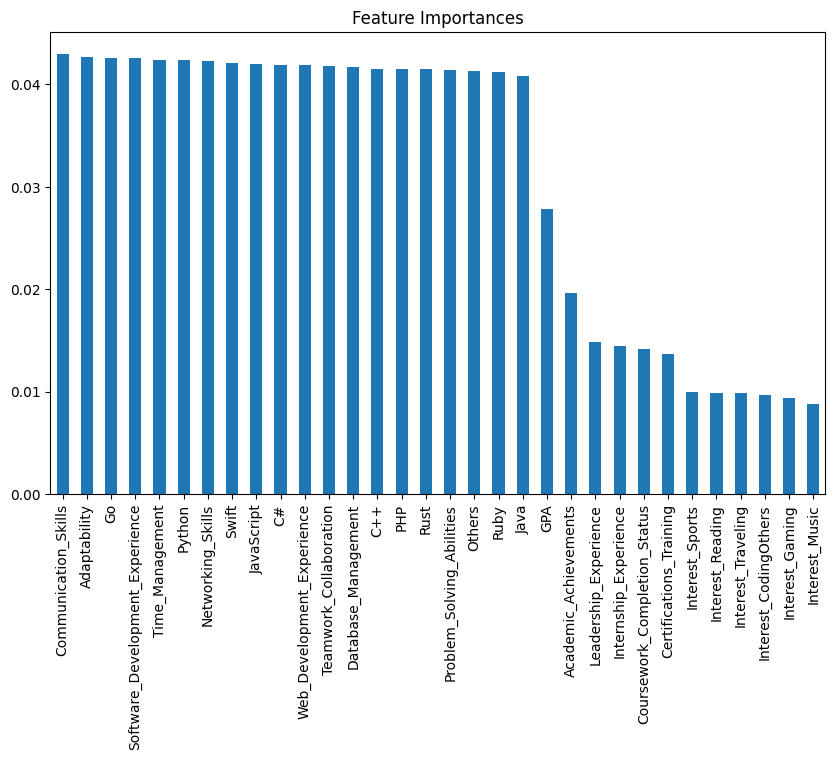

KeyError: "None of [Index(['Communication_Skills', 'Adaptability', 'Go',\n       'Software_Development_Experience', 'Time_Management', 'Python',\n       'Networking_Skills', 'Swift', 'JavaScript', 'C#'],\n      dtype='object')] are in the [index]"

In [ ]:
# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

# Select top N features (e.g., top 10)
top_features = sorted_features.index[:10]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [ ]:
# Random Forest Classifier
random_forest_model.fit(X_train_selected, y_train)
rf_pred = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, zero_division=0)

# Display Results
results = {
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "Report": rf_report
    }
}
print("Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Classification Report:\n{metrics['Report']}")

Results:

Random Forest:
Accuracy: 0.6328828828828829
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        44
           1       0.42      0.64      0.51        44
           2       0.70      0.62      0.66        45
           3       0.54      0.56      0.55        45
           4       0.51      0.64      0.57        44
           5       0.66      0.70      0.68        44
           6       0.63      0.61      0.62        44
           7       0.51      0.51      0.51        45
           8       0.76      0.64      0.69        44
           9       0.77      0.68      0.72        44
          10       0.54      0.62      0.58        45
          11       0.61      0.77      0.68        44
          12       0.52      0.57      0.54        44
          13       0.68      0.61      0.64        44
          14       0.56      0.60      0.58        45
          15       0.57      0.57      0.57        44
    